In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.287132403424465 45.71762811728763
-86.02092719482218 -176.4071534666735
-88.10505004958931 -135.56198622457083
-40.21026576901081 167.5104509368066
85.86000504241028 58.498659646894964
11.252510835733148 32.93729726590479
-47.84347177538128 18.26638046617788
-55.1629322057752 11.373437775230059
-44.47558374307356 -80.43610487628175
44.22271321430597 -119.611153515924
-51.819816177471274 -176.4585815194087
35.129469775855 101.76834779195843
-2.218299238273076 -151.12320413159938
13.021991683679033 115.11743517056556
67.32955878807351 -85.3838240214331
-6.42775644946515 -55.190849995245
78.81294049449698 22.269190199812414
-71.17716309265171 126.32367401790555
-70.30893708750258 -161.1998492142684
-9.790154004318566 -6.030187623973802
5.778850271645311 29.85702201252019
14.061070405360155 145.15916904169347
37.62668610868076 -174.06857330329967
48.0304022028792 36.418067213248776
87.04953576140693 80.48369684679881
26.716207597649017 102.96596993116384
74.96807303421687 93.4086799182

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
import requests
requests.__version__


'2.28.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=380b949baadc69dacad99fa497f42584


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# TW Should enumerate what is defined above/earlier in this coding.
# which is (cities) NOT city_data because it's declared empty[]. 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hokitika
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | marabba
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | redmond
Processing Record 11 of Set 1 | xining
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | bacuit
City not found. Skipping...
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | itaituba
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | maridi
Processing Record 21 of Set 1 | airai
Pr

Processing Record 36 of Set 4 | lethem
Processing Record 37 of Set 4 | west wendover
Processing Record 38 of Set 4 | dingle
Processing Record 39 of Set 4 | namatanai
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | natal
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 43 of Set 4 | finschhafen
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | pietermaritzburg
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | ahumada
City not found. Skipping...
Processing Record 48 of Set 4 | banmo
City not found. Skipping...
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | kalianget
Processing Record 1 of Set 5 | methven
Processing Record 2 of Set 5 | mehamn
Processing Record 3 of Set 5 | chinhoyi
Processing Record 4 of Set 5 | cabinda
Processing Record 5 of Set 5 | mayo
Processing Record 6 of Set 5 | grand centre
City not found. Skip

Processing Record 25 of Set 8 | salisbury
Processing Record 26 of Set 8 | maceio
Processing Record 27 of Set 8 | alofi
Processing Record 28 of Set 8 | bambous virieux
Processing Record 29 of Set 8 | obertyn
Processing Record 30 of Set 8 | verkhovye
Processing Record 31 of Set 8 | kaitangata
Processing Record 32 of Set 8 | orthez
Processing Record 33 of Set 8 | kisangani
Processing Record 34 of Set 8 | prince rupert
Processing Record 35 of Set 8 | mastic beach
Processing Record 36 of Set 8 | weligama
Processing Record 37 of Set 8 | inirida
Processing Record 38 of Set 8 | kodiak
Processing Record 39 of Set 8 | provideniya
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | umm lajj
Processing Record 43 of Set 8 | araguatins
City not found. Skipping...
Processing Record 44 of Set 8 | totness
Processing Record 45 of Set 8 | ocotepec
Processing Record 46 of Set 8 | sabha
Processing Record 47 of Se

Processing Record 15 of Set 12 | omboue
Processing Record 16 of Set 12 | ko samui
Processing Record 17 of Set 12 | kondinskoye
Processing Record 18 of Set 12 | marfino
Processing Record 19 of Set 12 | kodinsk
Processing Record 20 of Set 12 | kinablangan
Processing Record 21 of Set 12 | ejido
Processing Record 22 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 23 of Set 12 | sembakung
Processing Record 24 of Set 12 | kuytun
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | nioro
Processing Record 27 of Set 12 | zhangye
Processing Record 28 of Set 12 | afmadu
City not found. Skipping...
Processing Record 29 of Set 12 | mount gambier
Processing Record 30 of Set 12 | caconda
Processing Record 31 of Set 12 | yablonovo
Processing Record 32 of Set 12 | tumut
Processing Record 33 of Set 12 | astana
Processing Record 34 of Set 12 | dakar
Processing Record 35 of Set 12 | gondar
Processing Record 36 of Set 12 | mazagao
Processing Record 37

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,65.43,82,100,8.48,ZA,2022-10-14 22:27:02
1,Vaini,-21.2000,-175.2000,80.76,78,20,14.97,TO,2022-10-14 22:27:03
2,Rikitea,-23.1203,-134.9692,72.54,73,0,6.82,PF,2022-10-14 22:27:03
3,Hokitika,-42.7167,170.9667,53.64,66,76,1.95,NZ,2022-10-14 22:27:04
4,Marabba,12.3500,32.1833,84.83,56,85,11.18,SD,2022-10-14 22:27:04
5,Bredasdorp,-34.5322,20.0403,57.58,84,100,11.01,ZA,2022-10-14 22:27:05
6,Hermanus,-34.4187,19.2345,58.80,82,100,15.77,ZA,2022-10-14 22:27:05
7,Castro,-24.7911,-50.0119,59.47,99,100,6.87,BR,2022-10-14 22:27:06
8,Redmond,47.6740,-122.1215,78.53,51,25,1.99,US,2022-10-14 22:27:06
9,Xining,36.6167,101.7667,42.67,48,99,2.75,CN,2022-10-14 22:27:03


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-10-14 22:27:02,-33.0153,27.9116,65.43,82,100,8.48
1,Vaini,TO,2022-10-14 22:27:03,-21.2000,-175.2000,80.76,78,20,14.97
2,Rikitea,PF,2022-10-14 22:27:03,-23.1203,-134.9692,72.54,73,0,6.82
3,Hokitika,NZ,2022-10-14 22:27:04,-42.7167,170.9667,53.64,66,76,1.95
4,Marabba,SD,2022-10-14 22:27:04,12.3500,32.1833,84.83,56,85,11.18


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

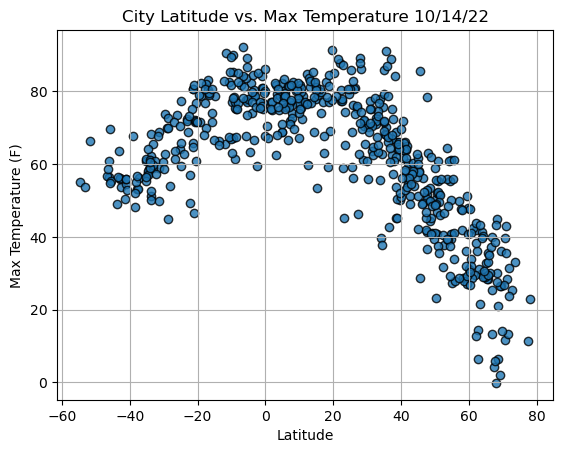

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

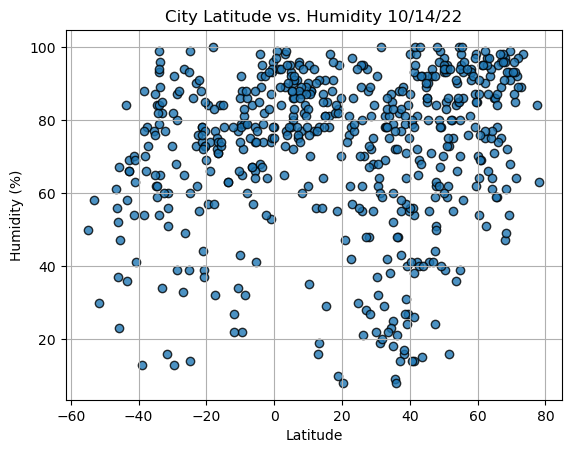

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

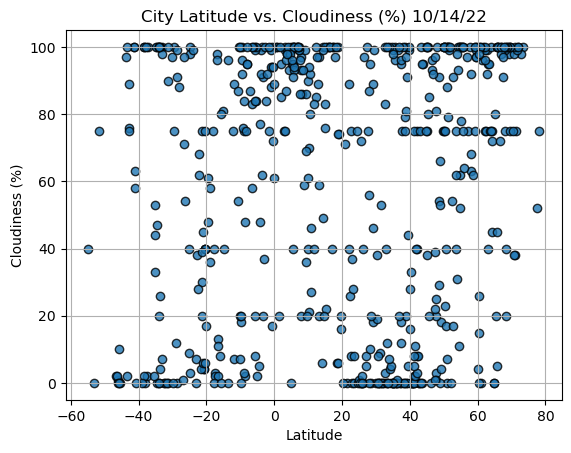

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

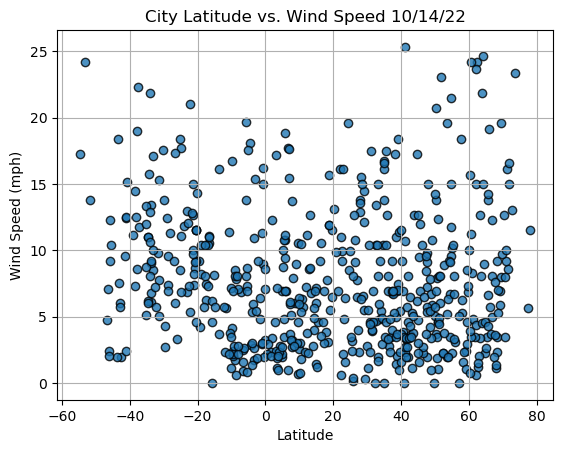

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [21]:
# To access a group of rows and columns in the DataFrame by an index label.
# This case - row # 13 
index13 = city_data_df.loc[13]

In [22]:
# To pull data latitudes greated than or eaqual to 0.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
566    False
567    False
568    False
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [23]:
# or Use the loc method and see to get the first five rows. 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Marabba,SD,2022-10-14 22:27:04,12.3500,32.1833,84.83,56,85,11.18
8,Redmond,US,2022-10-14 22:27:06,47.6740,-122.1215,78.53,51,25,1.99
9,Xining,CN,2022-10-14 22:27:03,36.6167,101.7667,42.67,48,99,2.75
12,Longyearbyen,SJ,2022-10-14 22:27:08,78.2186,15.6401,22.84,63,75,11.50
15,Jamestown,US,2022-10-14 22:27:09,42.0970,-79.2353,56.01,41,75,8.05


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

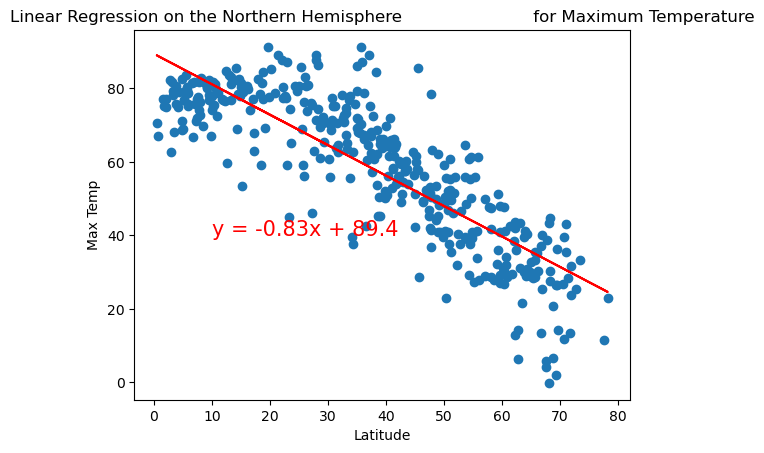

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

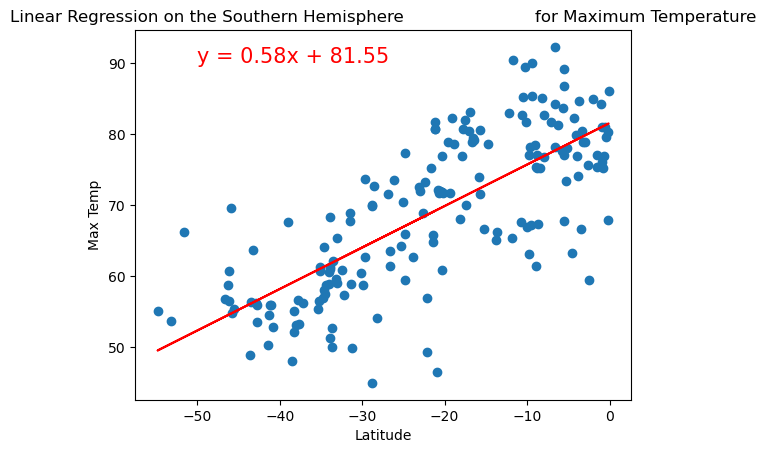

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

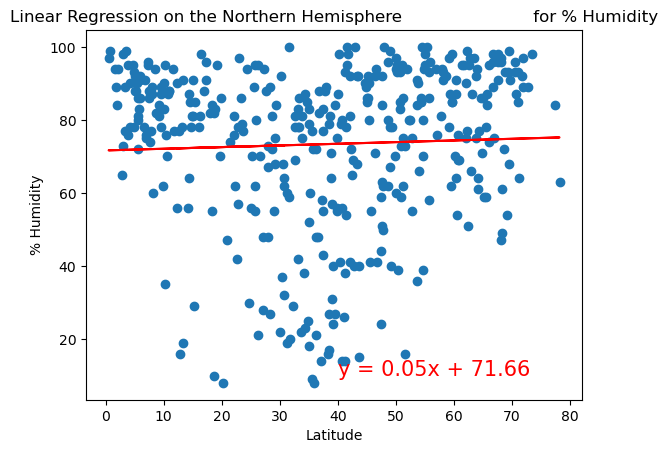

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

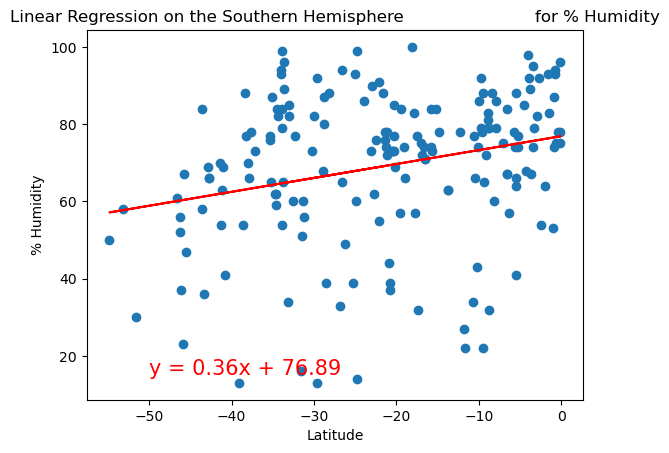

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

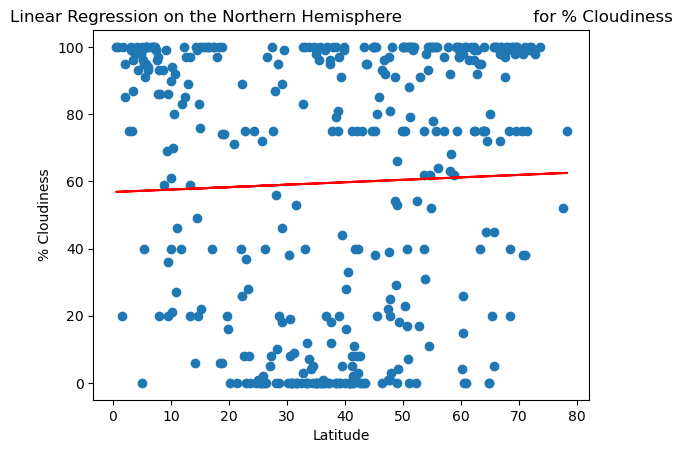

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

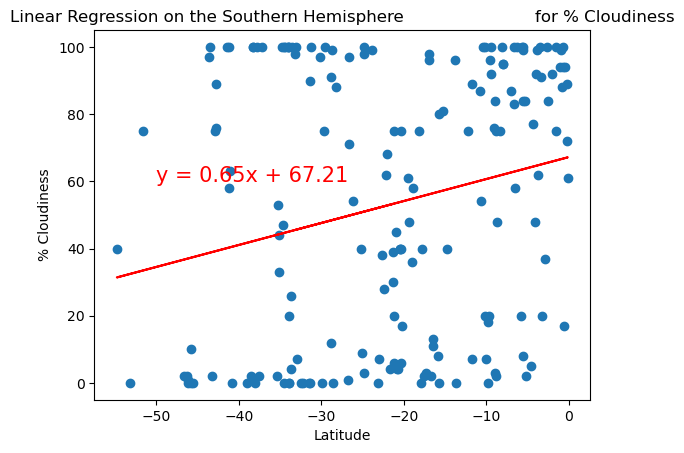

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

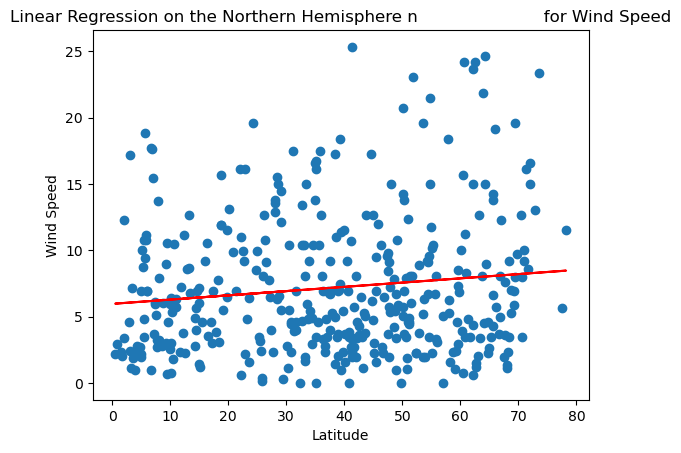

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere n\
                        for Wind Speed', 'Wind Speed',(40,35))

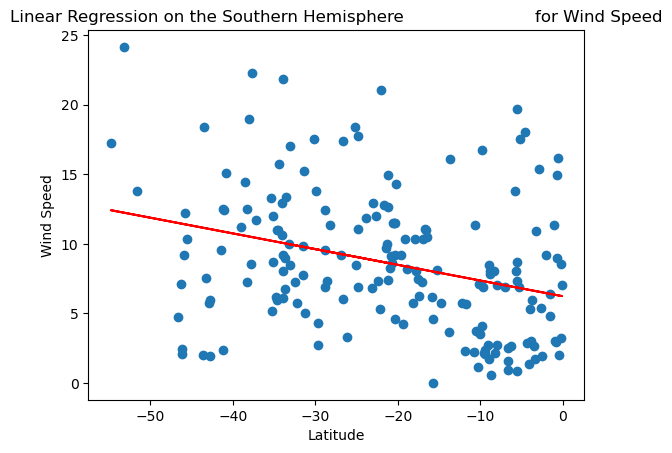

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))